In [19]:
import numpy as np
import pymc as pm
import arviz as az

weights = [4,1]
    
with pm.Model() as model:
    
    weights = np.array(weights) / np.sum(weights)  # Normalize weights

    #w_1 = pm.Normal("w_1", mu=weights[0], sigma=0.00001)

    #w = [w_1, 1 - w_1]

    #w = pm.Dirichlet("w", a=np.array(weights), transform=None)

    # Create component distributions
    components = [pm.Normal.dist(0, 1), pm.Normal.dist(30, 1)]



    # Mixture distribution
    mixed_normal = pm.Mixture("mixed_normal", w=weights, comp_dists=components) #pm.math.constant(weights)

    step = pm.DEMetropolis()
    trace = pm.sample(10000, tune=1000, step = step, chains =8,  cores=1, initvals=[{"mixed_normal": 0}, {"mixed_normal": 15}, {"mixed_normal": 0}, "mixed_normal": , {"mixed_normal": 0}, {"mixed_normal": 15}, {"mixed_normal": 0}, {"mixed_normal": 15}])


az.plot_trace(trace)


SyntaxError: invalid syntax (1373244220.py, line 26)

Population sampling (4 chains)
DEMetropolis: [w, mixed_normal]
Chains are not parallelized. You can enable this by passing `pm.sample(cores=n)`, where n > 1.


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'mixed_normal'}>,
        <Axes: title={'center': 'mixed_normal'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

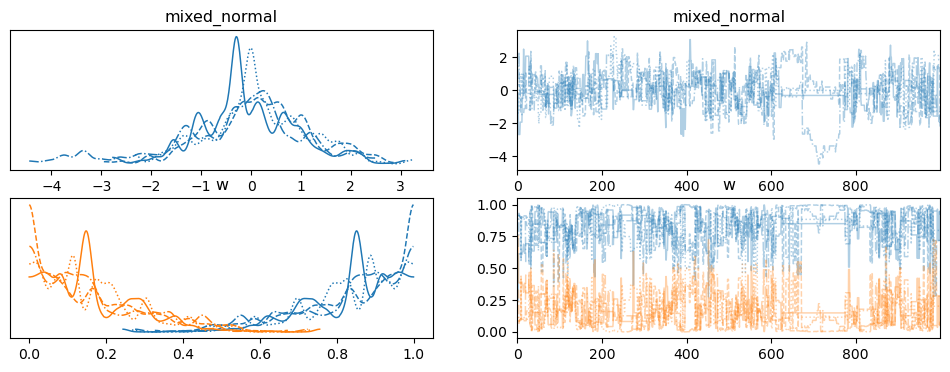

In [16]:
import numpy as np
import pymc as pm
import arviz as az

weights = [4,1]
    
with pm.Model() as model:
    
    w = pm.Dirichlet("w", a=np.array([4, 1]))

    # Create component distributions
    components = [pm.Normal.dist(0, 1), pm.Normal.dist(30, 1)]


    # Mixture distribution
    mixed_normal = pm.Mixture("mixed_normal", w=w, comp_dists=components) #pm.math.constant(weights)

    step = pm.DEMetropolis()
    trace = pm.sample(1000, tune=1000, step = step, chains =10, cores=1, initvals=[{"mixed_normal": 0}, {"mixed_normal": 15}, {"mixed_normal": 0}, {"mixed_normal": 15}])


az.plot_trace(trace)
